# Neural Networks
Notebook adapted and inspired from: https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb


In [1]:
# some imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
#import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)
gpu_available = tf.test.is_gpu_available()
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)
is_cuda_gpu_min_3 = tf.test.is_gpu_available(True, (3,0))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [3]:
print(tf.__version__)
print(is_cuda_gpu_available)
print(is_cuda_gpu_min_3)

2.3.0
True
True


# Neural Networks

Neural nets are a specific method for learning from data, a method that is based on a very simple element, the *neuron unit*. A neuron unit (or 1-layer neural network) is a mathematical function of this kind:

${\mathbf y} = \sigma(\mathbf{w}^T \cdot {\mathbf x} + b)$

where ${\mathbf x}$ represents an input element in vector form, $\mathbf{w}$ is a vector of weights,  $\sigma$ is a non-linear function and $b$ a scalar value. $(\mathbf{w},b)$ are called the parameters of the function. The output of this function is called the *activation* of the neuron. 

Regarding the non-linear function, historically the most common one was the Sigmoid function, but nowadays there are several alternatives that are supposed to be better suited to learning from data, such as ReLU and variants.

> **Q:** What kind of decision functions are represented by a 1-layer nn?

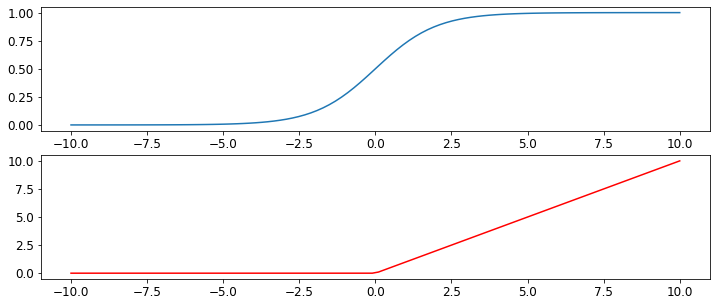

In [4]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return x * (x > 0)

plt.ylim(-1.5, 10)
x = np.linspace(-10.0,10.0,100)
y1 = sigmoid(x)
plt.subplot(2, 1, 1)
plt.plot(x,y1)
y2 = ReLU(x)
plt.subplot(2, 1, 2)
plt.plot(x,y2,'r')

In [5]:
x = np.array([0.4,1.2,3.5])

w = np.array([1.0,2.0,1.0])
b = 1.3

y = sigmoid(np.dot(x,w) + b)

print(y)

0.9994997988929205


## Multilayer neural networks

Simple neurons can be organized in larger structures by applying to the same data vector different sets of weights, forming what is called a *layer*, and by stacking layers one on top of the output of the other.  

It is important to notice that a multilayer neural network can be seen as a composition of matrix products (matrices represent weights) and non-linear function activations. For the case of a 2-layer network the outcome is:

$ {\mathbf y} = {\mathbf \sigma}\Big( W^1  {\mathbf \sigma}\Big( W^0  {\mathbf x} + {\mathbf b}^0 \Big) + {\mathbf b}^1 \Big)$

where ${\mathbf \sigma}$ represents a vectorial version of the sigmoid function and $W^i$ are the weights of each layer in matrix form.  

What is interesting about this kind of structures is that it has been showed that even a neural network with a single hidden layer containing a finite number of neurons can approximate any continuous function of $\mathbf{R}^n$. This fact makes neural networks a sound candidate to implement learning from data methods. The question is then: how to find the optimal parameters, ${\mathbf w} = (W^i,{\mathbf b})$, to approximate a function that is implicitly defined by a set of samples $\{({\mathbf x}_1, {\mathbf y}_1), \dots,  ({\mathbf x}_n, {\mathbf y}_n)\}$?

From a technical point of view, not only neural networks but most of the algorithms that have been proposed to infer models from large data sets are based on the iterative solution of a mathematical problem that involves data and a mathematical model. If there was an analytic solution to the problem, this should be the adopted one, but this is not the case for most of the cases. The techniques that have been designed to tackle these problems are grouped under a field that is called optimization. The most important technique for solving optimization problems is *gradient descend*.

> The training of models like $ {\mathbf y} = {\mathbf \sigma}\Big( W^1  {\mathbf \sigma}\Big( W^0  {\mathbf x} + {\mathbf b}^0 \Big) + {\mathbf b}^1 \Big)$ (or bigger!) can be readily performed by applying *automatic differentiation* to a loss function. 

> In the case of regression: $L = \frac{1}{n} \sum_{i=1}^n \Big({\mathbf y}_i - {\mathbf \sigma}\Big( W^1  {\mathbf \sigma}\Big( W^0  {\mathbf x}_i + {\mathbf b}^0 \Big) + {\mathbf b}^1 )\Big)\Big)^2 $

> In the case of two-class classification: $L = \frac{1}{n} log(1 + exp(-y_i {\mathbf \sigma}\Big( W^1  {\mathbf \sigma}\Big( W^0  {\mathbf x} + {\mathbf b}^0 \Big) + {\mathbf b}^1 \Big))) $


## Playing with neural nets.
+ Concentric classes, 1 layer, Sigmoid.
+ Concentric classes, 1 layer, ReLu.
+ X-or, 0 layer.
+ X-or, 1 layer.
+ Spiral data.
+ Regression.


http://playground.tensorflow.org

# Deep Learning in `keras`

> Keras is a high-level neural networks library, written in Python and capable of running on top TensorFlow. It was developed with a focus on enabling fast experimentation.

The core data structure of Keras is a model, a way to organize layers. The main type of model is the ``Sequential model``, a linear stack of layers. 

```Python
from keras.models import Sequential
model = Sequential()
```

Stacking layers is as easy as ``.add()``:

```Python
from keras.layers import Dense, Activation

model.add(Dense(output_dim=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))
```

Once your model looks good, configure its learning process with ``.compile()``:

```Python
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', metrics=['accuracy'])
```

If you need to, you can further configure your optimizer.

```Python
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
```

You can now iterate on your training data in batches:

```Python
model.fit(X_train, Y_train, nb_epoch=5, batch_size=32)
```

Evaluate your performance in one line:
```Python
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
```

Or generate predictions on new data:

```Python
classes = model.predict_classes(X_test, batch_size=32)
proba = model.predict_proba(X_test, batch_size=32)
```

In [6]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [7]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13118867161299250980,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6243575372206929447
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5060693856
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13150205569743722986
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:0b:00.0, compute capability: 6.1",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13266469394280067744
 physical_device_desc: "device: XLA_GPU device"]

## Building an image classifier with keras

In [8]:
from tensorflow import keras
keras.__version__


'2.4.0'

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [10]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):



In [11]:
X_train_full.dtype

dtype('uint8')


Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [12]:
X_valid,    X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

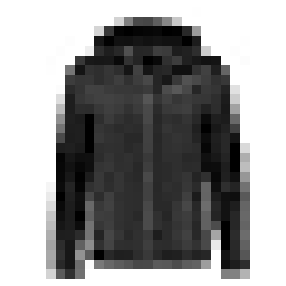

In [13]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [14]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [15]:
# Here are the corresponding class names:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# The first image in the training set is a coat:
print(class_names[y_train[0]])

Coat


In [16]:
# The validation set contains 5,000 images, and the test set contains 10,000 images:
print(X_valid.shape)

(5000, 28, 28)


In [17]:
# The test set contains 5,000 images, and the test set contains 10,000 images:
print(X_test.shape)

(10000, 28, 28)


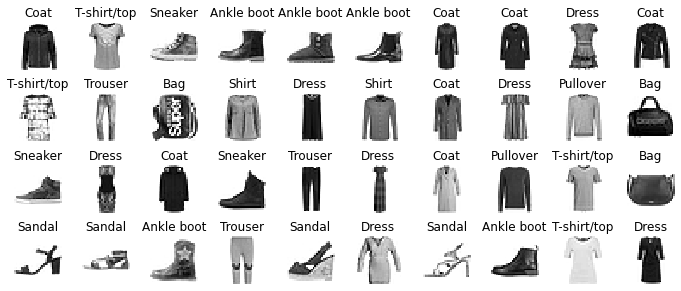

In [18]:
# Let's take a look at a sample of the images in the dataset:

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [19]:
# clear previous session
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
# Let's create a classification model for this problem
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# Option 2
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.layers

In [22]:
# How many parameters does the model have? Think about it

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
#we can plot the model using the following funcition
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

#if it does not work, perhaps some packages need to be installed:
#!conda install -y graphviz
#!conda install -y pydot

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [25]:
# lets define our loss function, optimizer and accuracy metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

this is equivalent to
```python

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

```


In [26]:
print(type(X_train))
print(X_train.shape)

print(type(X_train[0]))

<class 'numpy.ndarray'>
(55000, 28, 28)
<class 'numpy.ndarray'>


In [27]:
# let's train the classifier for 5 epochs
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7013 - accuracy: 0.7692 - val_loss: 0.5180 - val_accuracy: 0.8198

In [28]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [29]:
print(history.epoch)


[0, 1, 2, 3, 4]


In [30]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

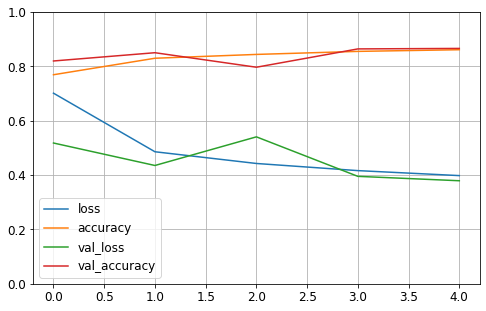

In [31]:
# it is important to plot the training curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
# let's evaluate the test set. 
model.evaluate(X_test, y_test,verbose=2)

313/313 - 0s - loss: 0.4192 - accuracy: 0.8501


[0.41924843192100525, 0.8500999808311462]

[0.   0.   0.   0.   0.   0.2  0.   0.2  0.01 0.6 ]


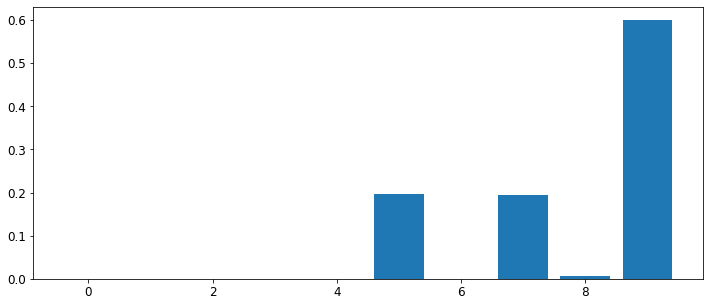

In [33]:
# we can evaluate on sample
X_new = X_test[:1]
y_proba = model.predict(X_new)[0]
print(y_proba.round(2))
plt.bar(range(y_proba.shape[0]),y_proba)
plt.show()

In [34]:
# if we want to test several examples

X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

y_pred = model.predict_classes(X_new)
print("\nclass predixtions", y_pred)

[[0.   0.   0.   0.   0.   0.2  0.   0.2  0.01 0.6 ]
 [0.   0.   0.97 0.   0.01 0.   0.02 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

class predixtions [9 2 1]


Epoch 1/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7367 - accuracy: 0.7555 - val_loss: 0.5313 - val_accuracy: 0.8142

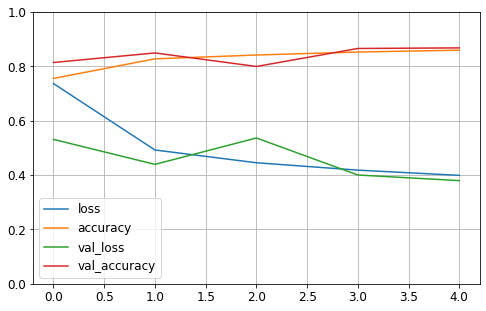

313/313 - 0s - loss: 0.4181 - accuracy: 0.8517


[0.4181044399738312, 0.8517000079154968]

In [35]:
# Let's put everything in one cell:

# create the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# define loss function, optimizer and metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# train the model and validate using val data
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

# plot training curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# evaluate the model using test data
model.evaluate(X_test, y_test,verbose=2)

## Regression with MLP

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [37]:
np.random.seed(42)
tf.random.set_seed(42)

Epoch 1/15
363/363 [==============================] - 0s 1ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/15
363/363 [==============================] - 0s 1ms/step - loss: 0.7047 - val_loss: 0.6531

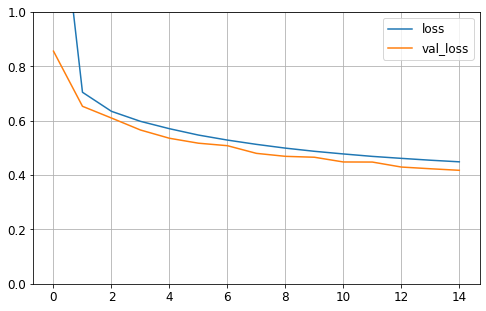

Evaluating test set
162/162 - 0s - loss: 0.4409


0.4408838152885437

In [38]:
# create the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

# define loss function, optimizer and metrics
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3))


# train the model and validate using val data
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

# plot training curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# evaluate the model using test data
print("Evaluating test set")
model.evaluate(X_test, y_test,verbose=2)

### Dropout

Dropout is a way to regularize the neural network. During training, it may happen that neurons of a particular layer may always become influenced only by the output of a particular neuron in the previous layer. In that case, the neural network would overfit.

Dropout prevents overfitting and regularizes by randomly cutting the connections (also known as dropping the connection) between neurons in successecutive layers during training.

### Keras optimizers

There are several variants of gradient descent, which differ in how we compute the step.

Keras supports seven optimizers.

```python
my_opt = K.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
my_opt = K.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
my_opt = K.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
my_opt = K.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
my_opt = K.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
my_opt = K.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
my_opt = K.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
```

#### Momentum

For example, SGD has trouble navigating ravines, i.e. areas where the surface curves much more steeply in one dimension than in another, which are common around local optima. In these scenarios, SGD oscillates across the slopes of the ravine while only making hesitant progress along the bottom towards the local optimum.

**Momentum** is a method that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction of the update vector of the past time step to the current update vector:

$$ v_t = m v_{t-1} + \alpha \nabla_w f $$$$ w = w - v_t    $$

The momentum $m$ is commonly set to $0.9$.

#### Adagrad

SGD manipulates the learning rate globally and equally for all parameters. Tuning the learning rates is an expensive process, so much work has gone into devising methods that can adaptively tune the learning rates, and even do so per parameter.

Adagrad is an algorithm for gradient-based optimization that does just this: It adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters.

$$ c = c + (\nabla_w f)^2 $$$$ w = w - \frac{\alpha}{\sqrt{c}} $$

## Saving and Restoring

Training a Neural Network can take a lot of time. Saving and restoring the model could be really important

In [39]:
np.random.seed(42)
tf.random.set_seed(42)

In [40]:
# we create and train a model

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])


model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test,verbose=2)

model.save("my_keras_model.h5")

Epoch 1/5
363/363 [==============================] - 0s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880

In [41]:
X_new = X_valid

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

print(model.predict(X_new))

model = keras.models.load_model("my_keras_model.h5")
print('\nloading model...')
print(model.predict(X_new))
mse_test = model.evaluate(X_test, y_test,verbose=2)


[[-0.03813155]
 [-0.02429847]
 [-0.21792842]
 ...
 [-0.09412773]
 [-0.06511023]
 [-0.08687452]]

loading model...
[[1.538158 ]
 [2.1465645]
 [2.1462462]
 ...
 [1.7110337]
 [2.045248 ]
 [2.1147661]]
162/162 - 0s - loss: 0.5059


In [43]:
# this is the samle
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")


### Using Callbacks during Training

In [44]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880

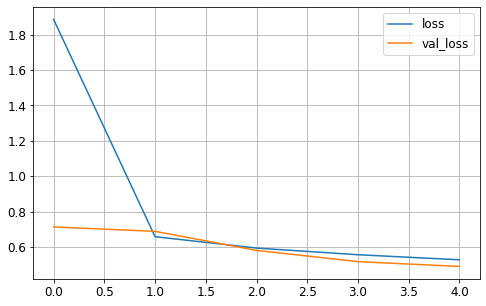

162/162 - 0s - loss: 0.5059


In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# define a call back
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)


history = model.fit(X_train, y_train, epochs=5, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

# plot training curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

mse_test = model.evaluate(X_test, y_test,verbose=2)

In [46]:
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test, verbose = 2)

162/162 - 0s - loss: 0.5059


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.7160 - val_loss: 0.7932
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7118 - val_loss: 0.7703

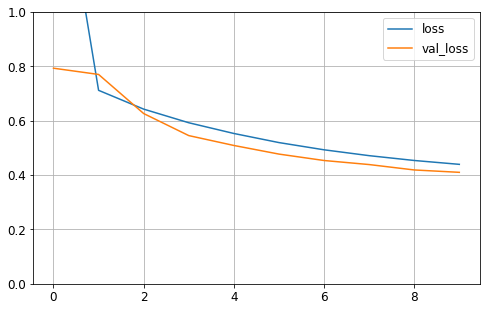

162/162 - 0s - loss: 0.4298
0.4298315644264221


In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[8]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# define a call back
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)


history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

# plot training curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test, verbose = 2)
print(mse_test)

### Early stopping

In [48]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test, verbose = 2)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4282 - val_loss: 0.4048
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4189 - val_loss: 0.4115

### Exercice
Create a netwerok that achieves at least a 90% accuracy with fashion MNIST.

In [49]:
# data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [50]:
# create the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [51]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/150
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0681 - mssse: 12797.1680 - val_loss: 0.7078 - val_mssse: 12676.5098

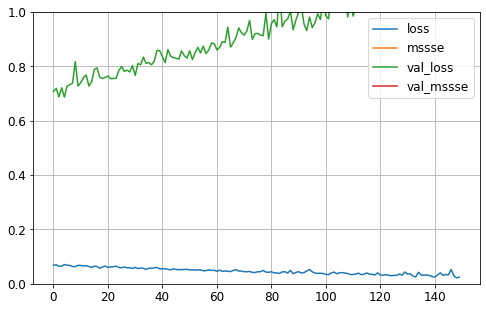

313/313 - 0s - loss: 1.1095 - mssse: 12733.3545


[1.1095410585403442, 12733.3544921875]

In [69]:
# define loss function, optimizer and metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# train the model and validate using val data
history = model.fit(X_train, y_train, epochs=150,
                    validation_data=(X_valid, y_valid))

# plot training curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# evaluate the model using test data
model.evaluate(X_test, y_test,verbose=2)

In [63]:
print(X_test.shape)

(10000, 28, 28)
